In [2]:
import sys
import os
sys.path.insert(0,'/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/')

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
from scipy.ndimage import gaussian_filter
from scipy.interpolate import interp1d
import time
import copy

from minot.ClusterTools import map_tools
import pitszi

In [4]:
path = '/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/'

hdul = fits.open(path+'/Mock_cat_Bethermin2017.fits')
cat1 = hdul[1].data
hdul = fits.open(path+'/RA_pySIDES_from_original.fits')
cat2 = hdul[1].data
hdul = fits.open(path+'/pySIDES_from_original.fits')
cat3 = hdul[1].data

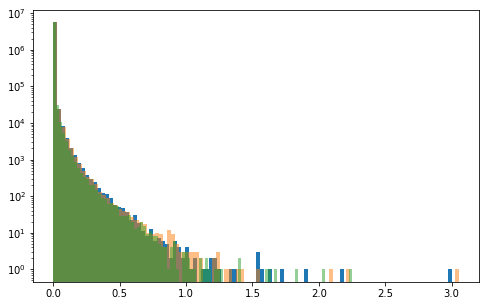

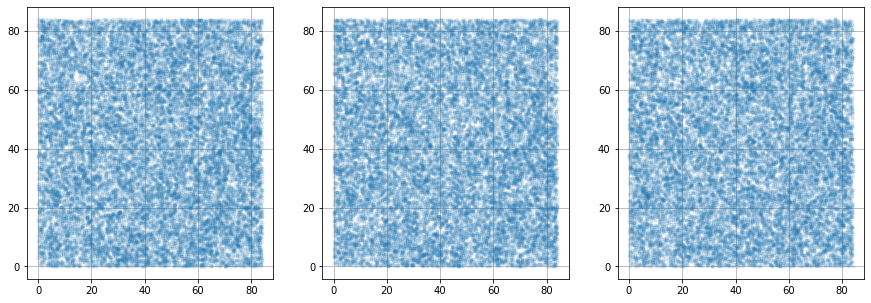

In [3]:
plt.figure(0, figsize=(8,5))
plt.hist(cat1['SNIKA2000']*1e3, bins=100)
plt.hist(cat2['SNIKA2000']*1e3, bins=100, alpha=0.5)
plt.hist(cat3['SNIKA2000']*1e3, bins=100, alpha=0.5)
plt.yscale('log')

plt.figure(1,figsize=(15,5))
ax = plt.subplot(1, 3, 1)
plt.plot(60*cat1['ra'][cat1['SNIKA2000']*1e3>0.05], 60*cat1['dec'][cat1['SNIKA2000']*1e3>0.05], 
         marker='.', ls='', alpha=0.1)
plt.grid()
ax = plt.subplot(1, 3, 2)
plt.plot(60*cat2['ra'][cat2['SNIKA2000']*1e3>0.05], 60*cat2['dec'][cat2['SNIKA2000']*1e3>0.05], 
         marker='.', ls='', alpha=0.1)
plt.grid()
ax = plt.subplot(1, 3, 3)
plt.plot(60*cat3['ra'][cat3['SNIKA2000']*1e3>0.05], 60*cat3['dec'][cat3['SNIKA2000']*1e3>0.05], 
         marker='.', ls='', alpha=0.1)
plt.grid()

In [18]:
print(np.amin(60*cat3['ra']), np.amax(60*cat3['ra']))
print(np.amin(60*cat3['dec']), np.amax(60*cat3['dec']))

0.0 84.0
0.0 84.0


In [44]:
# Define the center of subgrids of 10' x 10' maps
ra_lin = np.linspace(5, 75, 8)
dec_lin = np.linspace(5, 75, 8)
dra = 5
ddec = 5
ra2d, dec2d = np.meshgrid(ra_lin, dec_lin, indexing='xy')
ra_ctr = ra2d.flatten()
dec_ctr = dec2d.flatten()
print('Ncat: ', len(ra_ctr))
ra_lin, dec_lin

Ncat:  64


(array([ 5., 15., 25., 35., 45., 55., 65., 75.]),
 array([ 5., 15., 25., 35., 45., 55., 65., 75.]))

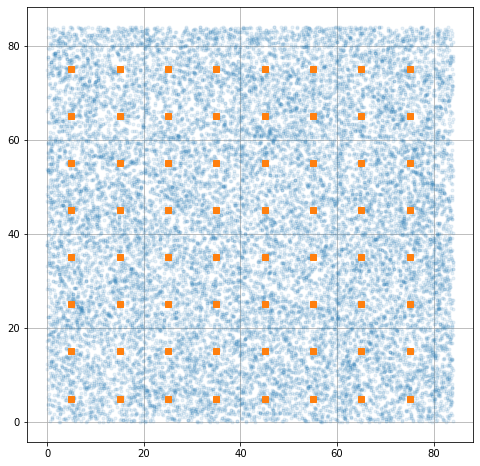

In [46]:
plt.figure(1,figsize=(8,8))
plt.plot(60*cat3['ra'][cat3['SNIKA2000']*1e3>0.05], 60*cat3['dec'][cat3['SNIKA2000']*1e3>0.05], 
         marker='.', ls='', alpha=0.1)
plt.plot(ra_ctr, dec_ctr, ls='', marker='s')
plt.grid()

In [62]:
subcat = []
subcat2 = []
for i in range(len(ra_ctr)):
    w1 = (cat3['ra']*60 > ra_ctr[i]-dra) * (cat3['ra']*60 <= ra_ctr[i]+dra)
    w2 = (cat3['dec']*60 > dec_ctr[i]-ddec) * (cat3['dec']*60 <= dec_ctr[i]+ddec)
    cat_i = cat3[w1*w2]
    cat_i['ra'] -= ra_ctr[i]/60
    cat_i['dec'] -= dec_ctr[i]/60
    subcat.append(cat3[w1*w2])
    subcat2.append(cat_i)

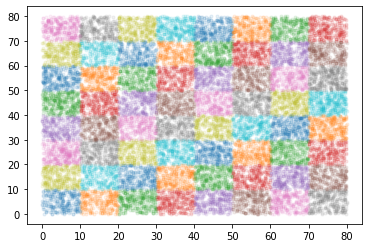

In [63]:
for i in range(len(subcat)):
    plt.plot(60*subcat[i]['ra'][subcat[i]['SNIKA2000']*1e3>0.05], 
             60*subcat[i]['dec'][subcat[i]['SNIKA2000']*1e3>0.05], 
             marker='.', ls='', alpha=0.1)

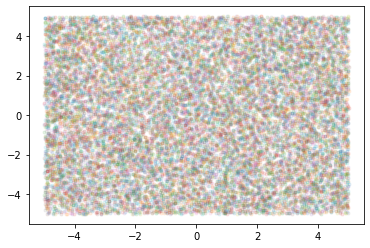

In [64]:
for i in range(len(subcat2)):
    plt.plot(60*subcat2[i]['ra'][subcat2[i]['SNIKA2000']*1e3>0.05], 
             60*subcat2[i]['dec'][subcat2[i]['SNIKA2000']*1e3>0.05], 
             marker='.', ls='', alpha=0.1)

/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/UCHUUcatalogs_prods/pySIDES_from_uchuu_tile_2_7.fits
/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/UCHUUcatalogs_prods/pySIDES_from_uchuu_tile_0_6.fits
/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/UCHUUcatalogs_prods/pySIDES_from_uchuu_tile_1_2.fits
/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/UCHUUcatalogs_prods/pySIDES_from_uchuu_tile_1_3.fits
/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/UCHUUcatalogs_prods/pySIDES_from_uchuu_tile_0_7.fits
/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/UCHUUcatalogs_prods/pySIDES_from_uchuu_tile_2_6.fits
/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/UCHUUcatalogs_pro

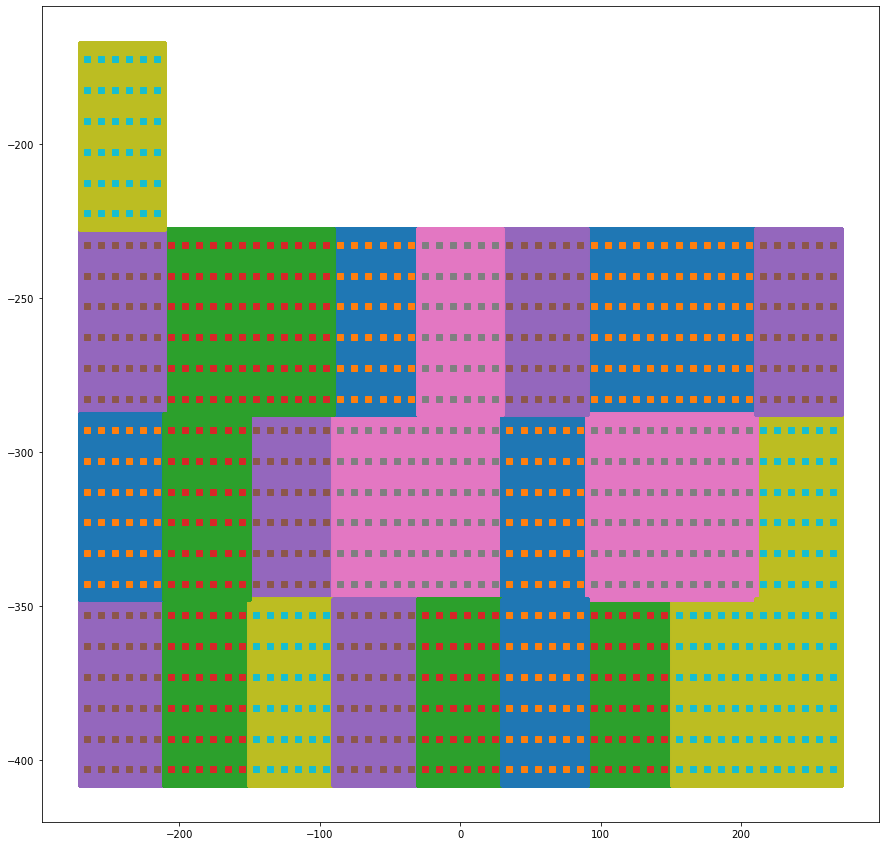

In [142]:
dra  = 5
ddec = 5

pathsave = '/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/CIB_cat_sim/'
path     = '/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/UCHUUcatalogs_prods/'
ignored = {".DS_Store"}
catfiles = [x for x in os.listdir(path) if x not in ignored]

plt.figure(1,figsize=(15,15))
idx = 1
for f in catfiles:
    print(path+f)
    hdul = fits.open(path+f)
    cat_i = hdul[1].data
    hdul.close()
    
    RA_min, RA_max   = np.amin(cat_i['ra']), np.amax(cat_i['ra'])
    Dec_min, Dec_max = np.amin(cat_i['dec']), np.amax(cat_i['dec'])
    Nra  = int((RA_max - RA_min) / (2*dra/60))
    Ndec = int((Dec_max - Dec_min) / (2*ddec/60))
    ra_lin  = np.linspace(dra, Nra*dra*2-dra, Nra) + RA_min*60
    dec_lin = np.linspace(ddec, Ndec*ddec*2-ddec, Ndec) + Dec_min*60
    ra2d, dec2d = np.meshgrid(ra_lin, dec_lin, indexing='xy')
    ra_ctr = ra2d.flatten()
    dec_ctr = dec2d.flatten()
    
    plt.plot(cat_i['ra']*60, cat_i['dec']*60, marker='.', ls='')    
    plt.plot(ra_ctr, dec_ctr, ls='', marker='s')
    
    for i in range(len(ra_ctr)):
        w1 = (cat_i['ra']*60  > ra_ctr[i]-dra)   * (cat_i['ra']*60  <= ra_ctr[i]+dra)
        w2 = (cat_i['dec']*60 > dec_ctr[i]-ddec) * (cat_i['dec']*60 <= dec_ctr[i]+ddec)
        cat_ii = cat_i[w1*w2]
        cat_ii['ra']  -= ra_ctr[i]/60
        cat_ii['dec'] -= dec_ctr[i]/60
        
        t = Table()
        t['ra'] = cat_ii['ra']
        t['dec'] = cat_ii['dec']
        t['redshift'] = cat_ii['redshift']
        t['SNIKA1200'] = cat_ii['SNIKA1200']
        t['SNIKA2000'] = cat_ii['SNIKA2000']
        t.write(pathsave+'CIBsim_'+str(idx)+'.fits', overwrite=True)
        
        idx += 1

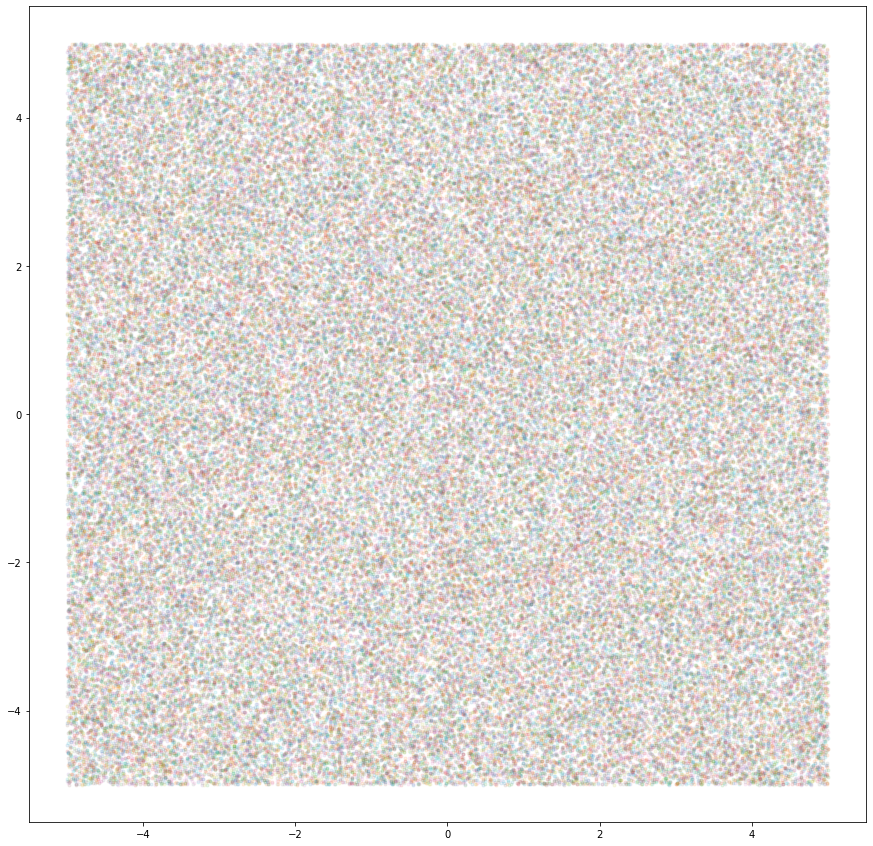

In [143]:
path     = '/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/sides-public-release-main/cats/CIB_cat_sim/'
ignored  = {".DS_Store"}
catfiles = [x for x in os.listdir(path) if x not in ignored]

plt.figure(1,figsize=(15,15))

for f in catfiles:
    hdul = fits.open(path+f)
    cat_i = hdul[1].data
    hdul.close()
    plt.plot(60*cat_i['ra'][cat_i['SNIKA2000']*1e3>0.1], 60*cat_i['dec'][cat_i['SNIKA2000']*1e3>0.1], 
             marker='.', ls='', alpha=0.1)

In [144]:
84*84/3600

1.96